In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

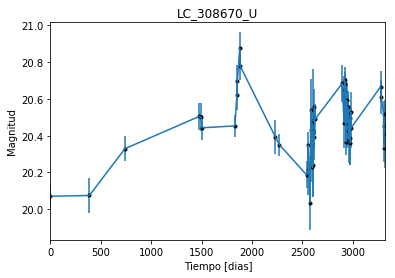

In [2]:
data = np.genfromtxt('LC_308670_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_308670_U')
plt.savefig("LC_308670_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

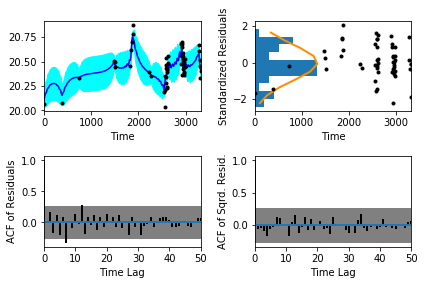

In [5]:
sample.assess_fit()

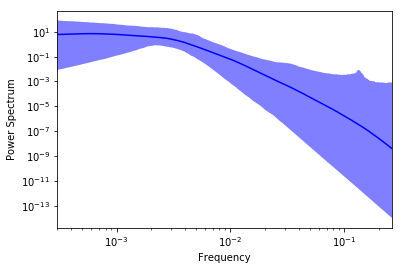

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

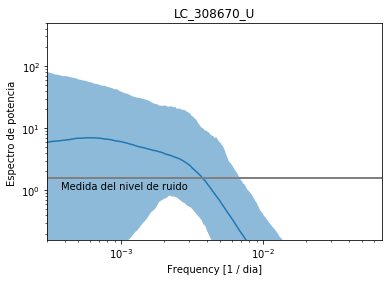

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_308670_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_308670_U')

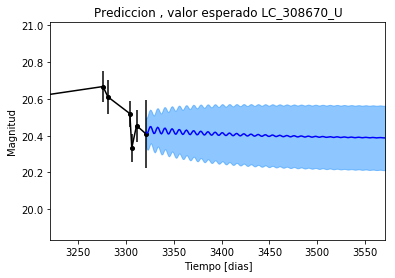

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_308670_U')

Text(0.5,1,'Prediccion, Caminos simulados_LC_308670_U')

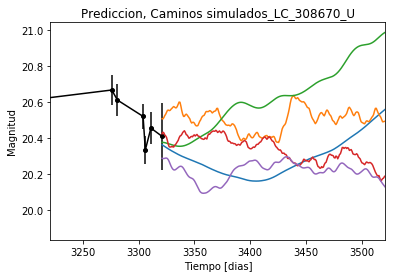

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_308670_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


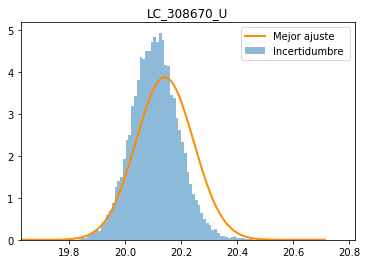

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_308670_U')
plt.savefig("Mejor_ajuste_LC_308670_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_308670_U')

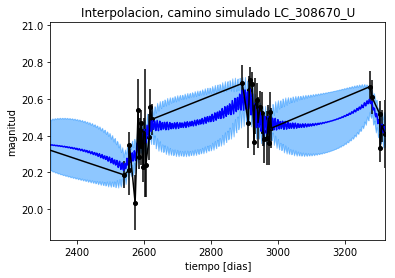

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_308670_U')

Text(0.5,1,'Interpolacion, camino simulado LC_308670_U')

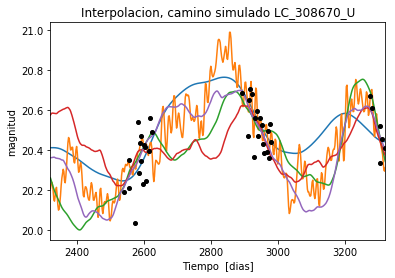

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_308670_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 870.30712375
Median: 0.00448222410717
Standard deviation: 0.0814573492061
68% credibility interval: [ 0.00069316  0.05546914]
95% credibility interval: [ 0.00035587  0.33316415]
99% credibility interval: [  3.08844710e-04   4.53949264e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 444.333623298
Median: 0.00215260883353
Standard deviation: 0.048473001094
68% credibility interval: [ 0.00057157  0.0198784 ]
95% credibility interval: [ 0.00033479  0.1547004 ]
99% credibility interval: [  3.05508612e-04   3.72234986e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 318.78913138
Median: 0.00944098689049
Standard deviation:

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 682.042714436
Median: 50.6859008151
Standard deviation: 1.64890733167
68% credibility interval: [ 48.93505437  51.84424018]
95% credibility interval: [ 46.38582312  52.74203119]
99% credibility interval: [ 44.03197705  53.46878778]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 572.334036606
Median: 0.314362608185
Standard deviation: 1.041615409
68% credibility interval: [ 0.04857693  1.74716438]
95% credibility interval: [ 0.01410495  3.4856972 ]
99% credibility interval: [ 0.00984485  5.05421386]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 587.241693708
Median: 0.0877676085772
Standard deviation: 2.43085208028
68% credibility interval: [ 0.00350027  2.60066527]
95% credibility interval: [  6.61833980e-04

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 7889.51509026
Median: 6.23995735192e-25
Standard deviation: 5.00247256423e+148
68% credibility interval: [  1.33908048e-74   6.46723268e+61]
95% credibility interval: [  1.02855723e-100   6.90863310e+132]
99% credibility interval: [  6.21269841e-111   2.65808572e+146]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 3207.46760954
Median: 20.405330802
Standard deviation: 0.0928066698027
68% credibility interval: [ 20.32065432  20.47831888]
95% credibility interval: [ 20.20670216  20.57119173]
99% credibility interval: [ 20.09837045  20.67708991]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 900.528141133
Median: 0.00584152986091
Standard deviation: 0.131146207117
68% credibility interval: [ 0.          0.20706673]
95% credibility interval: [ 0.          0.46727883]
99% credibility interval: [ 0.          0.51782421]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 900.528141133
Median: 0.00584152986091
Standard deviation: 0.131146207117
68% credibility interval: [ 0.          0.20706673]
95% credibility interval: [ 0.          0.46727883]
99% credibility interval: [ 0.          0.51782421]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 859.253077777
Median: 0.0
Standard deviation: 0.00132083393336
68% c

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 682.042714436
Median: 50.6859008151
Standard deviation: 1.64890733167
68% credibility interval: [ 48.93505437  51.84424018]
95% credibility interval: [ 46.38582312  52.74203119]
99% credibility interval: [ 44.03197705  53.46878778]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2066.13174387
Median: 0.0519826182455
Standard deviation: 0.0590192739235
68% credibility interval: [ 0.03090559  0.09627974]
95% credibility interval: [ 0.01978158  0.20395384]
99% credibility interval: [ 0.01534212  0.3679572 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1131.79643808
Median: 1.03613269198
Standard deviation: 0.17153533149
68% credibility interval: [ 0.88744687  1.22457518]
95% credibility interval: [ 0.75740783  1.43669164]
99% credibility interval: [ 0.71122773  1.5981387 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 628.328940621
Median: 1.4277728095e-05
Standard deviation: 0.0362243109196
68% credibility interval: [  1.79351448e-66   3.16720337e-03]
95% credibility interval: [  1.48297345e-135   6.21450756e-002]
99% credibility interval: [  4.83022707e-150   2.61949934e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 870.30712375
Median: (-0.0281626446536-0.0253469876705j)
Standard deviation: 0.970027511559
68% credibility interval: [-0.34852289-2.52222631j -0.00435527-1.47663716j]
95% credibility interval: [-2.09333207-0.56944592j -0.00223598-0.01714854j]
99% credibility interval: [ -2.85224734e+00-1.20285266j  -1.94052855e-03-0.03181674j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 444.333623298
Median: (-0.013525240195+0.0424596604434j)
Standard deviation: 0.878499849704
68% credibility interval: [-0.12489970+0.j         -0.00359129+0.18206497j]
95% credibility interval: [-0.97201126+0.33805996j -0.00210356+0.01313984j]
99% credibility interval: [ -2.33882140e+00+1.91294439j  -1.91956722e-03+0.031633j  ]
Posterior summary fo